### Importando bibliotecas

[pandas]('https://pandas.pydata.org]')


In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sci

### Verificando as versões das bibliotecas


In [116]:
print("Version of pandas => %s" % pd.__version__)
print("Version of numpy => %s" % np.__version__)
print("Version of seaborn => %s" % sns.__version__)
print("Version of scipy => %s" % sci.__version__)

Version of pandas => 1.4.2
Version of numpy => 1.22.2
Version of seaborn => 0.11.2
Version of scipy => 1.8.0


### Fazendo a leitura dos dados


In [117]:
dados = pd.read_csv('../data/files/estatistica_dados.csv', sep=',', encoding="utf-8")

### 1 Mostrando informações básicas do DataFrame


In [118]:
def mostrar_dados_basicos(dataframe: pd.DataFrame):
    print("Quantidade de linhas e colunas {}".format(dataframe.shape))
    print("Quantidade de dataframe nulos {}".format(dataframe.isna().sum().sum()))
    print(dataframe.dtypes)
    print(dataframe.head())


mostrar_dados_basicos(dados)

Quantidade de linhas e colunas (76840, 7)
Quantidade de dataframe nulos 0
UF                  int64
Sexo                int64
Idade               int64
Cor                 int64
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object
   UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
0  11     0     23    8              12    800  1.603808
1  11     1     23    2              12   1150  1.739790
2  11     1     35    8              15    880  1.760444
3  11     0     46    2               6   3500  1.783158
4  11     1     47    8               9    150  1.690631


### 1.1 Tipos de dados


### Variáveis qualitativas ordinais

##### Variáveis que podem ser ordenada ou hierarquizadas

- Anos de estudo - (qualitativo ordenal)


In [119]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

##### Variáveis qualitativoas nominais

- Sexo
- Cor
- UF


In [120]:
print('UF {}'.format(sorted(dados['UF'].unique())))
print('Sexo {}'.format(sorted(dados['Sexo'].unique())))
print('Cor {}'.format(sorted(dados['Cor'].unique())))

UF [11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 41, 42, 43, 50, 51, 52, 53]
Sexo [0, 1]
Cor [0, 2, 4, 6, 8]


In [121]:
print("Idade mínima {}".format(dados['Idade'].min()))
print("Idade máxima {}".format(dados['Idade'].max()))

Idade mínima 13
Idade máxima 99


In [122]:
print("Altura mínima {}".format(dados['Altura'].min()))
print("Altura máxima {}".format(dados['Altura'].max()))

Altura mínima 1.339244614
Altura máxima 2.028496765


### 2 Distribuição de frequência para variáveis qualitativas


In [123]:
dados["Sexo"].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [124]:
dados["Sexo"].value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [125]:
dados["Sexo"].value_counts(normalize=True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [126]:
frequencia = dados["Sexo"].value_counts()
percentual = dados["Sexo"].value_counts(normalize=True) * 100

In [127]:
dist_freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Percentual': percentual})
dist_freq_qualitativas.rename(index={0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq_qualitativas.rename_axis('Sexo', axis="columns", inplace=True)

In [128]:
dist_freq_qualitativas

Sexo,Frequencia,Percentual
Masculino,53250,69.299844
Feminino,23590,30.700156


In [129]:
sexo = {0: 'Masculino', 1: 'Feminio'}
cor = {0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'}

In [130]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminio,101,9621,2889,117,10862


In [131]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminio,0.131442,12.520822,3.759761,0.152264,14.135867


In [132]:
renda_media = pd.crosstab(dados.Sexo, dados.Cor, aggfunc='mean', values=dados.Renda)
renda_media.rename(index=sexo, inplace=True)
renda_media.rename(columns=cor, inplace=True)
renda_media

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminio,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### 2.1 Distribuição de frequência para variáveis quantitativoas

In [133]:
dados.Renda.min()

0

In [134]:
dados.Renda.max()

200000

In [135]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [136]:
labels = ['E', 'D', 'C', 'B', 'A']

In [137]:
pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest=True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [138]:
pd.value_counts(pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest=True))

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [139]:
frequencia = pd.value_counts(pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest=True))
percentual = pd.value_counts(pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest=True),
                             normalize=True) * 100

In [140]:
dist_freq_quantitativas = pd.DataFrame({'Frequencia': frequencia, 'Percentual': percentual})
dist_freq_quantitativas.sort_index(ascending=False)

,Frequencia,Percentual
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


#### Regra de Sturges  
k = 1 + 10 log10 n

In [141]:
n = dados.shape[0]

In [142]:
k = 1 + (10 / 3) * np.log10(n)
k = int(k.round(0))
k

17

In [143]:
pd.value_counts(pd.cut(x=dados.Renda, bins=17, include_lowest=True), sort=False)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [144]:
frequencia = pd.value_counts(pd.cut(x=dados.Renda, bins=17, include_lowest=True), sort=False)
percentual = pd.value_counts(pd.cut(x=dados.Renda, bins=17, include_lowest=True), sort=False, normalize=True)

In [145]:
dist_freq_amplitude_fixa = pd.DataFrame({'Frequencia': frequencia, 'Percentual': percentual})
dist_freq_amplitude_fixa

,Frequencia,Percentual
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


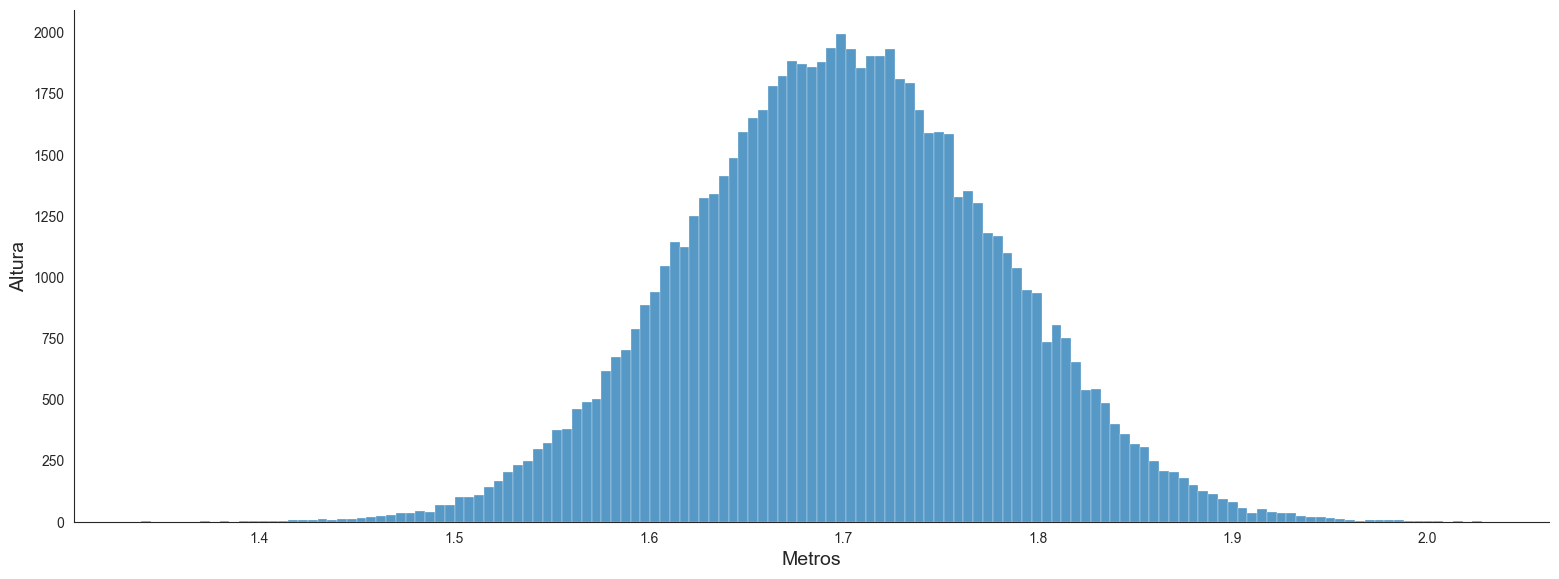

In [146]:
sns.set_style(style="white")
ax = sns.displot(dados.Altura, kde=False)
ax.figure.set_size_inches(18, 6)
ax.set_titles("Distribuição de Frequência - Altura", fontsize=18)
ax.set_xlabels("Metros", fontsize=14)
ax.set_ylabels("Altura", fontsize=14)
ax = ax

### 3 MEDIDAS DE TENDÊNCIAS CENTRAL

In [147]:
df = pd.DataFrame(data={'Fulano': [8, 10, 4, 8, 6, 10, 8], 'Beltrando': [10, 2, 0.5, 1, 3, 9.5, 10],
                        'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index=['Matemática', 'Português', 'Inglês', 'Geografia', 'História', 'Física', 'Química'])
df.rename_axis('Matérias', axis='columns', inplace=True)
df

Matérias,Fulano,Beltrando,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


#### 3.1 Média aritmética

In [148]:
# É representada por u quando se refere á população e por x quando se refere á amostra
# n: número de obeservações
# xi: valor da observação de registro

# A média é a somatória de todas as notas dividio pela somatória de todas as matárias
print('Médias de nota do Fulano => {} '.format(df['Fulano'].mean()))
print('Média do valor da Renda => {} '.format(dados.Renda.mean()))

Médias de nota do Fulano => 7.714285714285714 
Média do valor da Renda => 2000.3831988547631 


In [149]:
dados.groupby(by=['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

#### 3.2 Mediana

In [150]:
notas_fulano = df.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [151]:
# This is a Series
notas_fulano = notas_fulano.sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [152]:
# This is a DataFrame
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [153]:
elemento_mediano = (notas_fulano.shape[0] + 1) / 2
notas_fulano.loc[elemento_mediano - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [154]:
notas_fulano.Fulano.median()

8.0

In [155]:
notas_fulano.Fulano.quantile()

8.0

#### 3.3 Moda

In [156]:
# the value the most often into set data
df.mode()

Matérias,Fulano,Beltrando,Sicrano
0,8,10.0,8.0


In [157]:
example = pd.Series([1, 2, 2, 3, 4, 4, 5, 8, 8, ])
example

0    1
1    2
2    2
3    3
4    4
5    4
6    5
7    8
8    8
dtype: int64

In [158]:
example.mode()

0    2
1    4
2    8
dtype: int64

In [159]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

In [160]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

#### 3.4 Relationship between media, median, mode

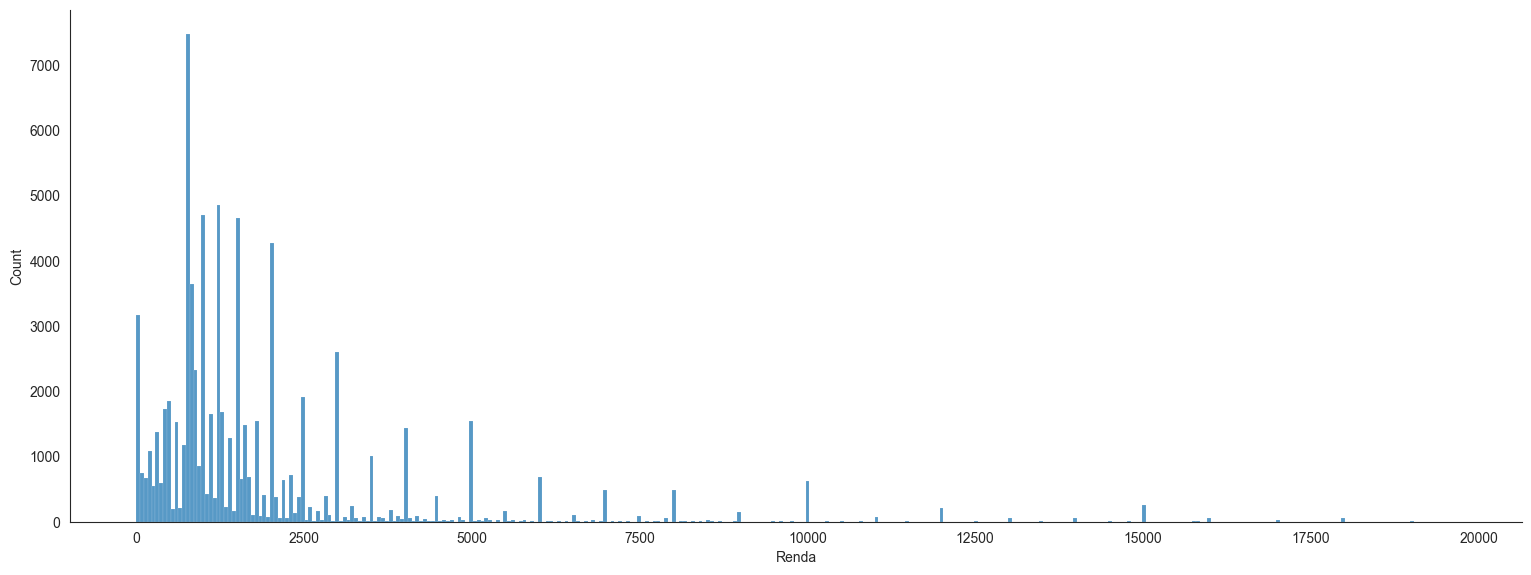

In [161]:
income = sns.displot(dados.query("Renda < 20000").Renda)
income.figure.set_size_inches(18, 6)
income = income

In [162]:
mode = dados.Renda.mode()[0]
mode

788

In [163]:
median = dados.Renda.median()
median

1200.0

In [164]:
media = dados.Renda.mean()
media

2000.3831988547631

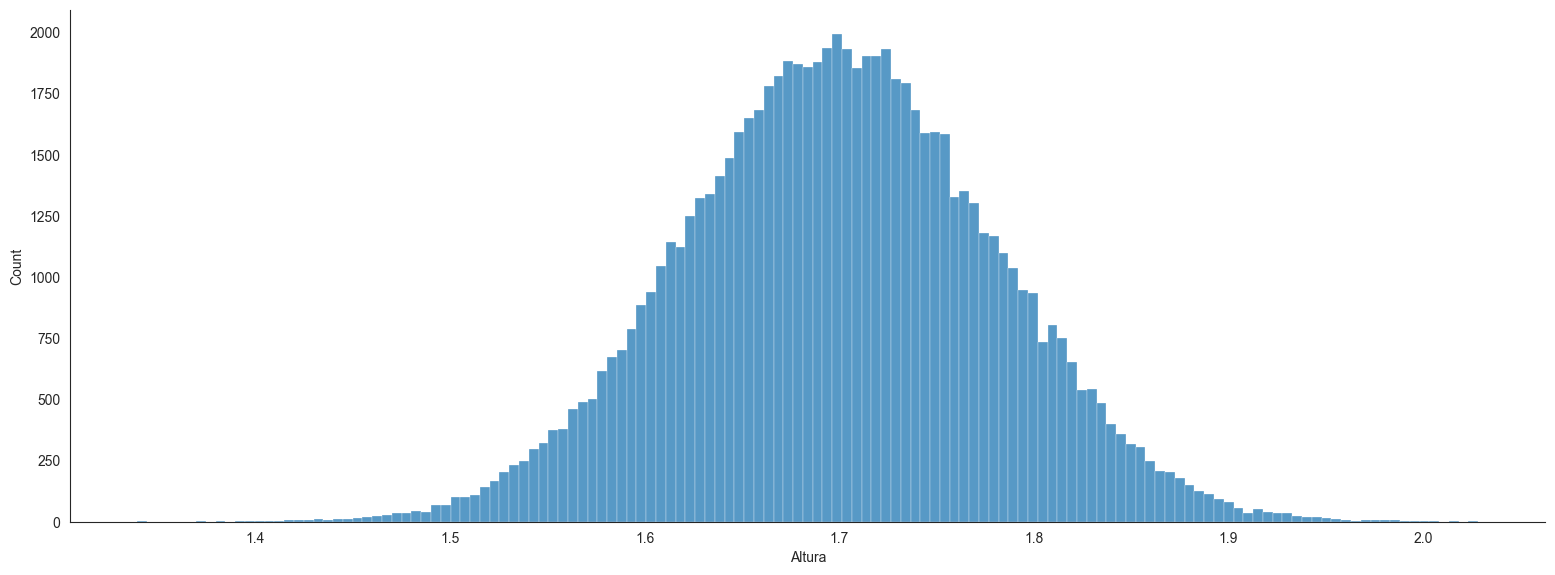

In [165]:
height = sns.displot(dados.Altura)
height.figure.set_size_inches(18, 6)
height = height

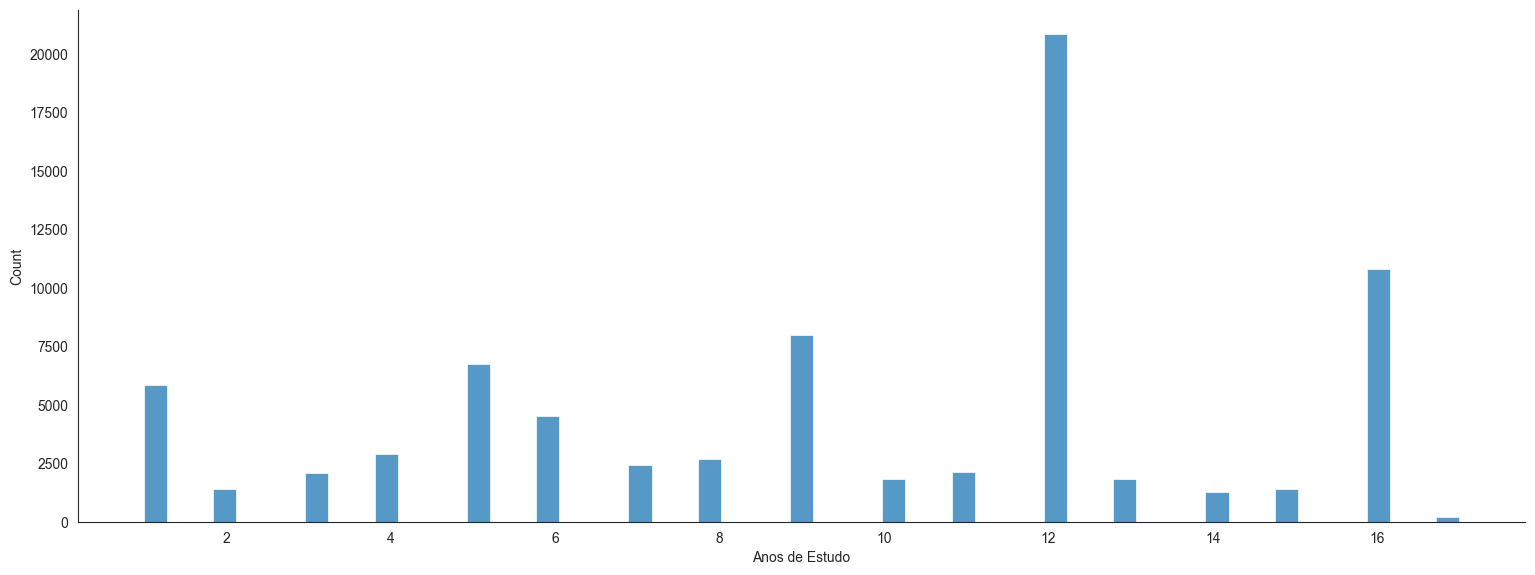

In [166]:
study_years = sns.displot(dados["Anos de Estudo"])
study_years.figure.set_size_inches(18, 6)
study_years = study_years

## 4 separatrix measure

#### 4.1 Quartis

In [167]:
dados.Renda.quantile()

1200.0

In [168]:
dados.Renda.quantile([[0.25, 0.5, 0.75]])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [170]:
[i / 10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [171]:
dados.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [172]:
dados.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

C:\Users\rober\Desktop\machine_learning\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


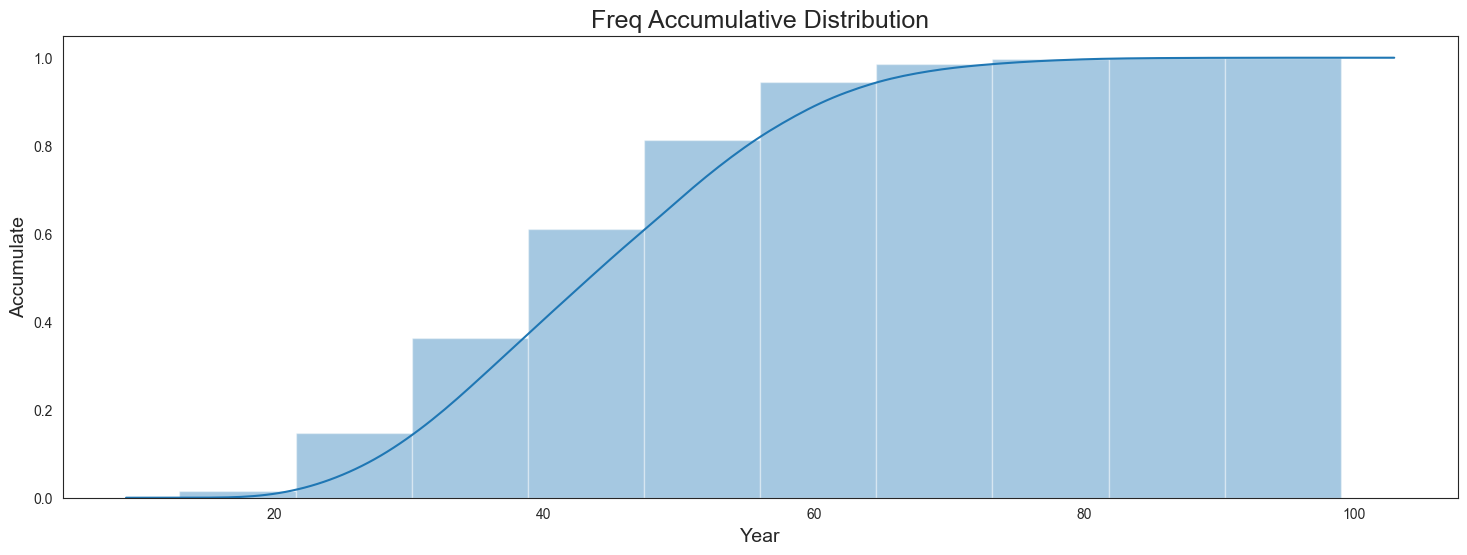

In [183]:
age = sns.distplot(dados.Idade, hist_kws={'cumulative': True}, kde_kws={'cumulative': True}, bins=10)
age.figure.set_size_inches(18, 6)
age.set_title("Freq Accumulative Distribution", fontsize=18)
age.set_ylabel("Accumulate", fontsize=14)
age.set_xlabel("Year", fontsize=14)
age = age

#### 4.2 Box-plot

O box plot dá uma ideia da posição, disperção, assimetria caudas e dados discrepantes (outliers).
A posição central é dada pela mediana e a disperção por IIQ. As posiçoes relativas de Q1, Mediana e Q3 dão uma noção da simetria da distribuição

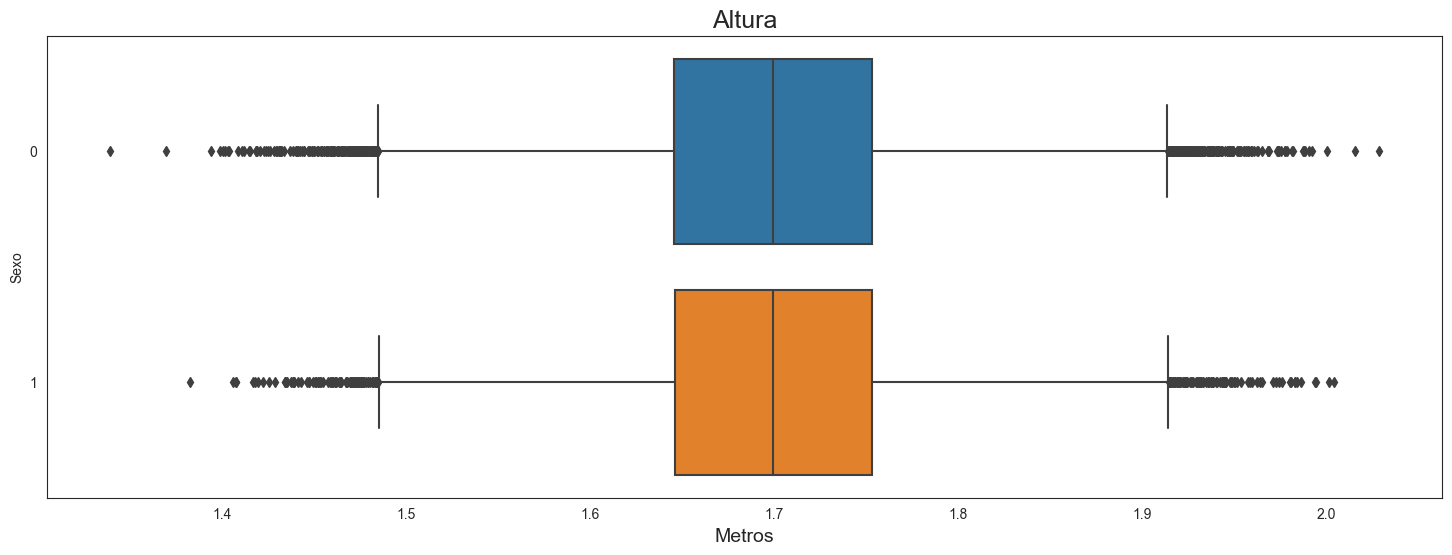

In [186]:
box_height = sns.boxplot(x="Altura", y="Sexo", data=dados, orient="h")
box_height.figure.set_size_inches(18,6)
box_height.set_title("Altura", fontsize=18)
box_height.set_xlabel("Metros", fontsize=14)
box_height = box_height

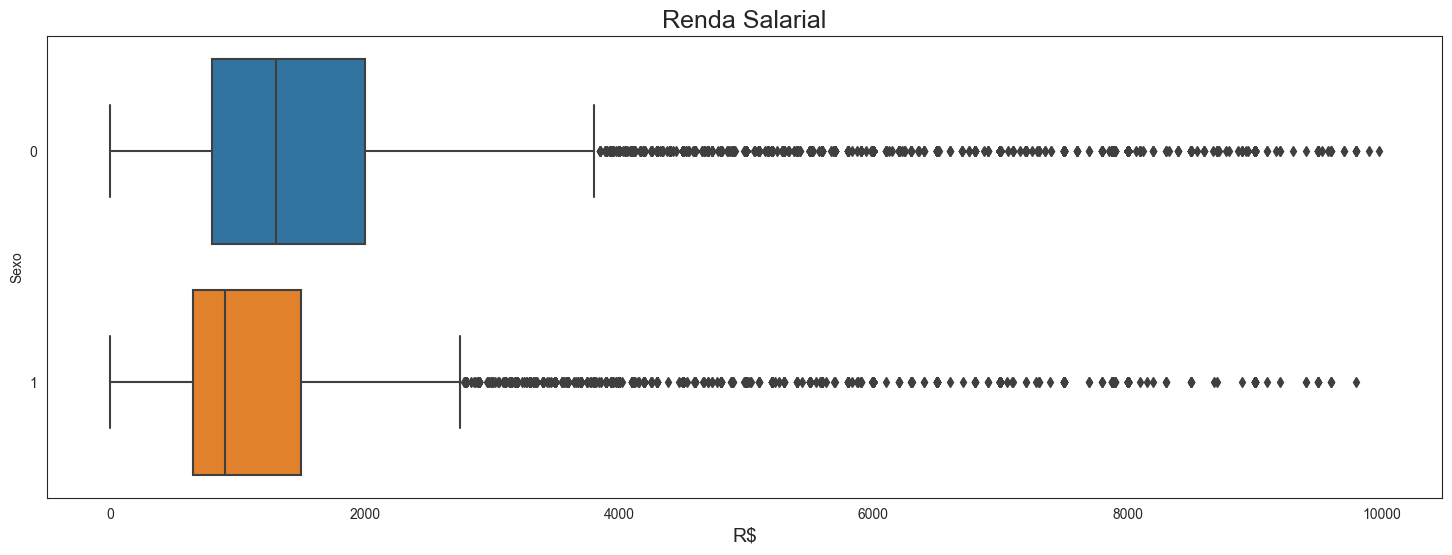

In [192]:
box_income = sns.boxplot(x="Renda", y="Sexo", data=dados.query("Renda < 10000"), orient="h")
box_income.figure.set_size_inches(18,6)
box_income.set_title("Renda Salarial", fontsize=18)
box_income.set_xlabel("R$", fontsize=14)
box_income = box_income

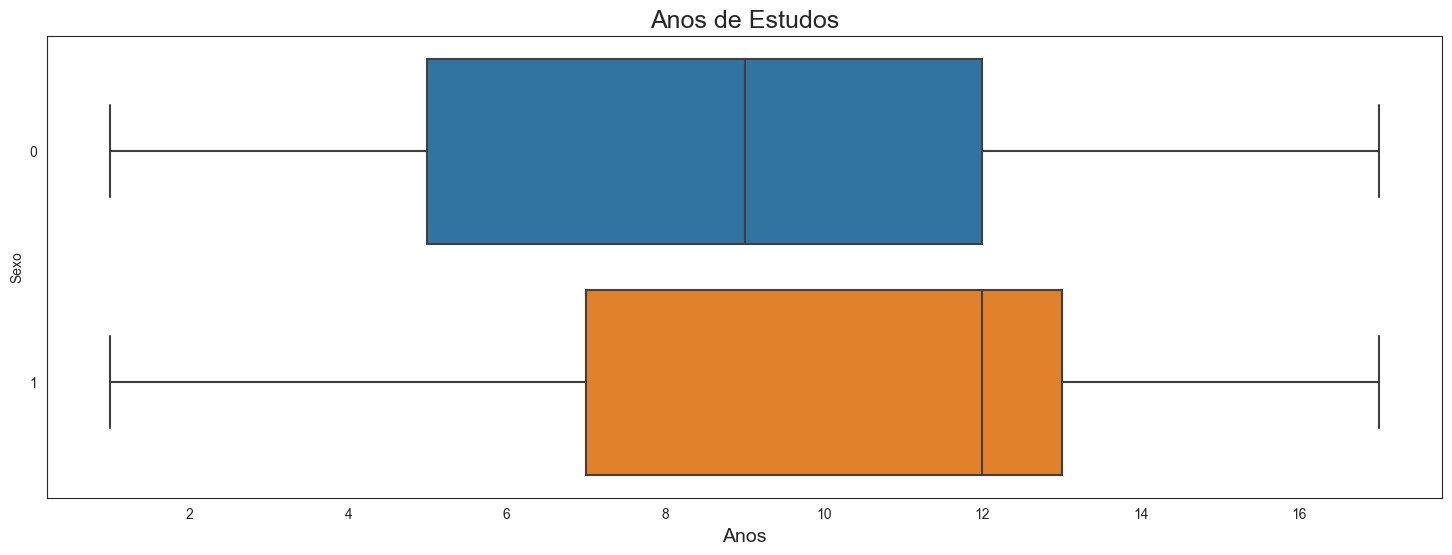

In [193]:
box_study_year = sns.boxplot(x="Anos de Estudo", y="Sexo", data=dados, orient="h")
box_study_year.figure.set_size_inches(18,6)
box_study_year.set_title("Anos de Estudo", fontsize=18)
box_study_year.set_xlabel("Anos", fontsize=14)
box_study_year = box_study_year

In [191]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
